Practical 6 : Implement Recurrent Neural Network (RNN) for sentiment analysis on IMDB review data.

ID : 21CE142

In [3]:
import pandas as pd
import numpy as np

In [4]:
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [5]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')
movie_reviews.isnull().values.any()

False

In [6]:
movie_reviews.shape
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
movie_reviews["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

<AxesSubplot:xlabel='sentiment', ylabel='count'>

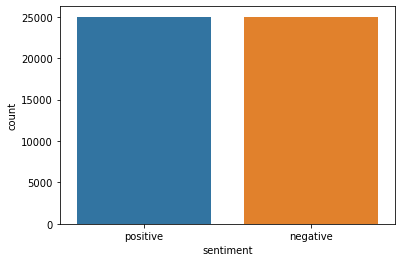

In [8]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [9]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
import string
string.punctuation
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    #sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence="".join([i for i in sentence if i not in string.punctuation])
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [11]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [12]:
movie_reviews["review"][3],X[3]

("Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",
 'Basically theres family where little boy Jake thinks theres zombie in his closet his parents are fighting all the timeThis movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombieOK first of all when youre go

In [13]:
#find the number of words in each review.
doc_len = []
docs=movie_reviews["review"]
docs=X
for i in range(len(docs)):
    count_w=len(docs[i].split(" "))
    doc_len.append(count_w)
doc_len=np.array(doc_len)
print("The mean is" + str(np.mean(doc_len)))

The mean is217.0889


In [14]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [16]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
#tokenizer = Tokenizer(num_words=5000)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
#sent = tokenizer.texts_to_sequences(sentence)

In [19]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'of',
 4: 'to',
 5: 'is',
 6: 'in',
 7: 'it',
 8: 'this',
 9: 'that',
 10: 'was',
 11: 'as',
 12: 'with',
 13: 'for',
 14: 'movie',
 15: 'but',
 16: 'film',
 17: 'on',
 18: 'not',
 19: 'you',
 20: 'are',
 21: 'his',
 22: 'have',
 23: 'be',
 24: 'he',
 25: 'one',
 26: 'its',
 27: 'at',
 28: 'all',
 29: 'by',
 30: 'an',
 31: 'they',
 32: 'from',
 33: 'who',
 34: 'like',
 35: 'so',
 36: 'or',
 37: 'just',
 38: 'her',
 39: 'about',
 40: 'has',
 41: 'out',
 42: 'if',
 43: 'some',
 44: 'what',
 45: 'there',
 46: 'good',
 47: 'very',
 48: 'more',
 49: 'when',
 50: 'even',
 51: 'no',
 52: 'my',
 53: 'up',
 54: 'would',
 55: 'she',
 56: 'time',
 57: 'only',
 58: 'which',
 59: 'really',
 60: 'their',
 61: 'see',
 62: 'story',
 63: 'were',
 64: 'had',
 65: 'can',
 66: 'me',
 67: 'than',
 68: 'we',
 69: 'much',
 70: 'well',
 71: 'been',
 72: 'get',
 73: 'will',
 74: 'do',
 75: 'into',
 76: 'great',
 77: 'bad',
 78: 'other',
 79: 'also',
 80: 'people',
 81: 'because',
 82:

In [20]:
sentence=['This is very good movie']
sentence.append('This is sample data')
sent = tokenizer.texts_to_sequences(sentence)
print(sent)

[[8, 5, 47, 46, 14], [8, 5]]


In [21]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('./glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [24]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [25]:
from keras.layers import SimpleRNN,Dense,Activation
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(SimpleRNN(10,input_shape = (vocab_size,maxlen), return_sequences=False, activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          19318200  
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                1110      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 19,319,321
Trainable params: 1,121
Non-trainable params: 19,318,200
_________________________________________________________________
None


In [27]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 15s 45ms/step - loss: 0.6865 - acc: 0.5374 - val_loss: 0.6773 - val_acc: 0.5535
Epoch 2/6
250/250 [==============================] - 10s 40ms/step - loss: 0.6493 - acc: 0.6117 - val_loss: 0.6397 - val_acc: 0.6351
Epoch 3/6
250/250 [==============================] - 10s 38ms/step - loss: 0.5845 - acc: 0.6909 - val_loss: 0.5704 - val_acc: 0.7013
Epoch 4/6
250/250 [==============================] - 10s 39ms/step - loss: 0.5605 - acc: 0.7132 - val_loss: 0.5963 - val_acc: 0.6873
Epoch 5/6
250/250 [==============================] - 10s 39ms/step - loss: 0.5217 - acc: 0.7407 - val_loss: 0.4987 - val_acc: 0.7540
Epoch 6/6
250/250 [==============================] - 10s 39ms/step - loss: 0.5542 - acc: 0.7050 - val_loss: 0.6520 - val_acc: 0.6043


In [28]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 4s 13ms/step - loss: 0.6517 - acc: 0.6056


In [29]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6517133116722107
Test Accuracy: 0.6055999994277954


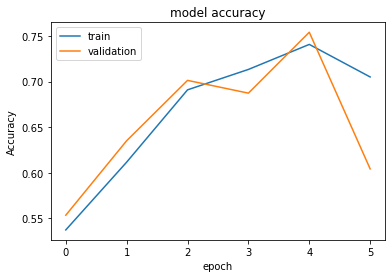

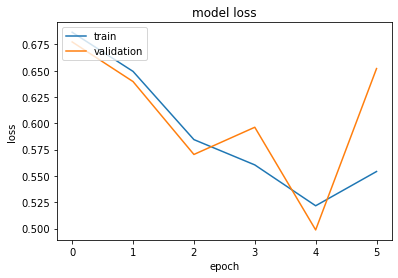

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [31]:
p =input("Enter your sentence: ")
p=preprocess_text(p)
print(p)
sentence=[]
sentence.append(p)
sent = tokenizer.texts_to_sequences(sentence)
print(sent)
sent = pad_sequences(sent, padding='post', maxlen=maxlen)
print(sent)
(model.predict(sent) > 0.5).astype("int32")

Enter your sentence:  This is a good movie and must watch


This is good movie and must watch
[[8, 5, 46, 14, 2, 204, 100]]
[[  8   5  46  14   2 204 100   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 1s 543ms/step


array([[1]])